The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [173]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np

# Start coding here!
# Update the file path to the correct location of the 'nobel.csv' file
df = pd.read_csv("data/nobel.csv")

## **Explore dataset and Cleaning data**

In [174]:
df.head()

year    category  ... death_city death_country
0  1901   Chemistry  ...     Berlin       Germany
1  1901  Literature  ...   Châtenay        France
2  1901    Medicine  ...    Marburg       Germany
3  1901       Peace  ...     Heiden   Switzerland
4  1901       Peace  ...      Paris        France

[5 rows x 18 columns]

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  1000 non-null   int64 
 1   category              1000 non-null   object
 2   prize                 1000 non-null   object
 3   motivation            912 non-null    object
 4   prize_share           1000 non-null   object
 5   laureate_id           1000 non-null   int64 
 6   laureate_type         1000 non-null   object
 7   full_name             1000 non-null   object
 8   birth_date            968 non-null    object
 9   birth_city            964 non-null    object
 10  birth_country         969 non-null    object
 11  sex                   970 non-null    object
 12  organization_name     736 non-null    object
 13  organization_city     735 non-null    object
 14  organization_country  735 non-null    object
 15  death_date            596 non-null    o

In [176]:
df.shape

(1000, 18)

In [177]:
# Check missing value
df.isna().sum()

year                      0
category                  0
prize                     0
motivation               88
prize_share               0
laureate_id               0
laureate_type             0
full_name                 0
birth_date               32
birth_city               36
birth_country            31
sex                      30
organization_name       264
organization_city       265
organization_country    265
death_date              404
death_city              421
death_country           415
dtype: int64

In [163]:
# change the format of birth_date to be date 
df['birth_date'] = pd.to_datetime(df['birth_date'], format='%Y-%m-%d')

ValueError: time data "1993-00-00" at position 932 doesn't match format specified

In [179]:
remove_value = ['1993-00-00', '1955-00-00', '1949-00-00', '1967-00-00', '1948-00-00', '1961-00-00', '1961-00-00', '1956-00-00', '1954-00-00', '1943-00-00', '1945-00-00', '1946-00-00']

# Filter the values that are not in the remove_values list using the ~ operator and the .isin() method.
df = df[~df['birth_date'].isin(remove_value)]

In [180]:
# change type by using to_datetime
df['birth_date'] = pd.to_datetime(df['birth_date'], format='%Y-%m-%d')

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 988 entries, 0 to 998
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   year                  988 non-null    int64         
 1   category              988 non-null    object        
 2   prize                 988 non-null    object        
 3   motivation            900 non-null    object        
 4   prize_share           988 non-null    object        
 5   laureate_id           988 non-null    int64         
 6   laureate_type         988 non-null    object        
 7   full_name             988 non-null    object        
 8   birth_date            956 non-null    datetime64[ns]
 9   birth_city            955 non-null    object        
 10  birth_country         958 non-null    object        
 11  sex                   958 non-null    object        
 12  organization_name     727 non-null    object        
 13  organization_city   

In [182]:
df.shape

(988, 18)

In [183]:
# change the format of death_date to be date 
df['death_date'] = pd.to_datetime(df['death_date'], format='%Y-%m-%d')

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 988 entries, 0 to 998
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   year                  988 non-null    int64         
 1   category              988 non-null    object        
 2   prize                 988 non-null    object        
 3   motivation            900 non-null    object        
 4   prize_share           988 non-null    object        
 5   laureate_id           988 non-null    int64         
 6   laureate_type         988 non-null    object        
 7   full_name             988 non-null    object        
 8   birth_date            956 non-null    datetime64[ns]
 9   birth_city            955 non-null    object        
 10  birth_country         958 non-null    object        
 11  sex                   958 non-null    object        
 12  organization_name     727 non-null    object        
 13  organization_city   

## **EDA - Exploratory data analysis and Answer the questions**

1. What is the most commonly awarded gender and birth country?
    * Store your answers as string variables top_gender and top_country.

In [185]:
df.head()

year    category  ... death_city death_country
0  1901   Chemistry  ...     Berlin       Germany
1  1901  Literature  ...   Châtenay        France
2  1901    Medicine  ...    Marburg       Germany
3  1901       Peace  ...     Heiden   Switzerland
4  1901       Peace  ...      Paris        France

[5 rows x 18 columns]

In [186]:
top_gender = df['sex'].value_counts().index[0] #index[0] select the first item from the index.
top_country = df['birth_country'].value_counts().index[0]

print("The gender with the most Nobel laureates  is:", top_gender)
print("The most common birth country of Nobel laureates  is:", top_country)

The gender with the most Nobel laureates  is: Male
The most common birth country of Nobel laureates  is: United States of America


2. Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?
    * Store this as an integer called max_decade_usa
    - Transfer to decade
    - filter the 'birth_country' to US-born
    - highest ratio
    - Total winners in all categories

In [187]:
df['birth_country'].value_counts()

United States of America                        288
United Kingdom                                   90
Germany                                          67
France                                           57
Sweden                                           30
                                               ... 
Russian Empire (Azerbaijan)                       1
Southern Rhodesia (Zimbabwe)                      1
Brazil                                            1
Guadeloupe Island                                 1
French protectorate of Tunisia (now Tunisia)      1
Name: birth_country, Length: 126, dtype: int64

In [188]:
# filter and create the new column of the United States of America
df['usa_born_winner'] = df['birth_country'] == 'United States of America'

In [189]:
# create the new decade column, so it needs to convert the year to be the decade
df['decade'] = (np.floor(df['year']/10)*10).astype(int)

In [190]:
df.head()

year    category  ... usa_born_winner decade
0  1901   Chemistry  ...           False   1900
1  1901  Literature  ...           False   1900
2  1901    Medicine  ...           False   1900
3  1901       Peace  ...           False   1900
4  1901       Peace  ...           False   1900

[5 rows x 20 columns]

In [191]:
prop_usa_winners = df.groupby('decade', as_index=False).agg(
                        total_winners=('usa_born_winner', 'size'),
                        us_winners=('usa_born_winner', 'sum'))

In [192]:
prop_usa_winners.head()

decade  total_winners  us_winners
0    1900             57           1
1    1910             40           3
2    1920             54           4
3    1930             56          14
4    1940             43          13

In [193]:
prop_usa_winners['ratio'] = (prop_usa_winners['us_winners']/ prop_usa_winners['total_winners']) * 100

In [194]:
prop_usa_winners.head()

decade  total_winners  us_winners      ratio
0    1900             57           1   1.754386
1    1910             40           3   7.500000
2    1920             54           4   7.407407
3    1930             56          14  25.000000
4    1940             43          13  30.232558

In [195]:
max_decade_usa = prop_usa_winners.sort_values('ratio', ascending=False).iloc[0]['decade'].astype(int)
max_ratio_usa = prop_usa_winners['ratio'].max().astype(int)

# Print the result
print(f"The decade with the highest ratio of US-born winners is {max_decade_usa:.0f} with a ratio of {max_ratio_usa}%.")

The decade with the highest ratio of US-born winners is 2000 with a ratio of 42%.


In [196]:
prop_usa_winners_melted = prop_usa_winners.melt(id_vars=['decade'], 
                                                value_vars=['total_winners', 'us_winners'], 
                                                var_name='Metric', 
                                                value_name='Count')

# Plot the data
ax1 = sns.relplot(x='decade', y='Count', data=prop_usa_winners_melted, 
                  kind='line', hue='Metric', aspect=2)

# Optional: Add labels and title
ax1.set_axis_labels('Decade', 'Number of Winners')
ax1.fig.suptitle('Comparison of Total Winners and US Winners by Decade')

Text(0.5, 0.98, 'Comparison of Total Winners and US Winners by Decade')

3. Which decade and Nobel Prize category combination had the highest proportion of female laureates?
    * Store this as a dictionary called max_female_dict where the decade is the key and the category is the value. There should only be one key:value pair.
    * decade
    * highest proportion of female laureates

In [197]:
df.head()

year    category  ... usa_born_winner decade
0  1901   Chemistry  ...           False   1900
1  1901  Literature  ...           False   1900
2  1901    Medicine  ...           False   1900
3  1901       Peace  ...           False   1900
4  1901       Peace  ...           False   1900

[5 rows x 20 columns]

In [198]:
# Add a column Female_laureates
df['Female_laureates'] = df['sex'] == 'Female'

In [199]:
prop_female_winners = df.groupby(['decade', 'category'], as_index=False)['Female_laureates'].mean()
prop_female_winners

decade    category  Female_laureates
0     1900   Chemistry          0.000000
1     1900  Literature          0.100000
2     1900    Medicine          0.000000
3     1900       Peace          0.071429
4     1900     Physics          0.076923
..     ...         ...               ...
67    2020   Economics          0.000000
68    2020  Literature          0.666667
69    2020    Medicine          0.166667
70    2020       Peace          0.333333
71    2020     Physics          0.166667

[72 rows x 3 columns]

In [200]:
# Find the decade and category with the highest proportion of female laureates
max_female_decade_category = prop_female_winners[prop_female_winners['Female_laureates'] == prop_female_winners['Female_laureates'].max()][['decade', 'category']]
max_female_decade_category

decade    category
68    2020  Literature

In [201]:
# Create a dictionary with the decade and category pair
max_female_dict = {max_female_decade_category['decade'].values[0]: max_female_decade_category['category'].values[0]}
max_female_dict

{2020: 'Literature'}

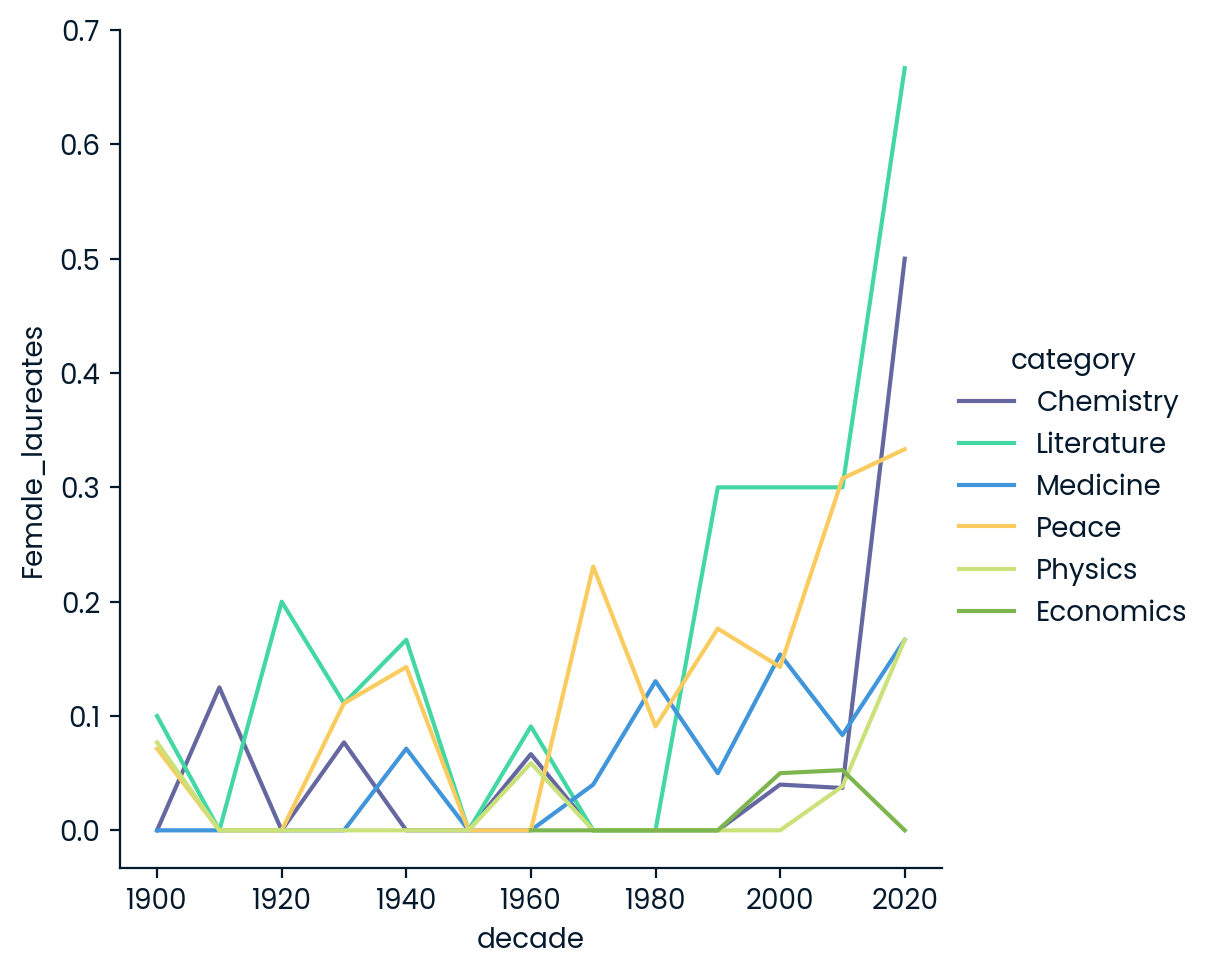

In [202]:
# Plotting female winners with % winners on the y-axis
ax2 = sns.relplot(x='decade', y='Female_laureates', hue='category', data=prop_female_winners, kind="line")

4. Who was the first woman to receive a Nobel Prize, and in what category?
    * Save your string answers as first_woman_name and first_woman_category.
    * first woman
    * what category?

In [203]:
df.head()

year    category  ... decade Female_laureates
0  1901   Chemistry  ...   1900            False
1  1901  Literature  ...   1900            False
2  1901    Medicine  ...   1900            False
3  1901       Peace  ...   1900            False
4  1901       Peace  ...   1900            False

[5 rows x 21 columns]

In [204]:
nobel_women = df[df['Female_laureates']]
nobel_women

year    category  ... decade Female_laureates
19   1903     Physics  ...   1900             True
29   1905       Peace  ...   1900             True
51   1909  Literature  ...   1900             True
62   1911   Chemistry  ...   1910             True
128  1926  Literature  ...   1920             True
..    ...         ...  ...    ...              ...
980  2022   Chemistry  ...   2020             True
982  2022  Literature  ...   2020             True
989  2023    Medicine  ...   2020             True
993  2023     Physics  ...   2020             True
998  2023       Peace  ...   2020             True

[63 rows x 21 columns]

In [205]:
min_row = nobel_women[nobel_women['year'] == nobel_women['year'].min()]
min_row

year category  ... decade Female_laureates
19  1903  Physics  ...   1900             True

[1 rows x 21 columns]

In [206]:
first_woman_name = min_row['full_name'].values[0]
first_woman_category = min_row['category'].values[0]

print(f" The first woman to receive a Nobel Prize is: {first_woman_name} and the category is {first_woman_category}.")

 The first woman to receive a Nobel Prize is: Marie Curie, née Sklodowska and the category is Physics.


5. Which individuals or organizations have won more than one Nobel Prize throughout the years?
    * Store the full names in a list named repeat_list.
    * compare individuals or organizations
    * won more than one Nobel Prize

In [207]:
df.head()

year    category  ... decade Female_laureates
0  1901   Chemistry  ...   1900            False
1  1901  Literature  ...   1900            False
2  1901    Medicine  ...   1900            False
3  1901       Peace  ...   1900            False
4  1901       Peace  ...   1900            False

[5 rows x 21 columns]

In [208]:
df.shape

(988, 21)

In [209]:
counts = df['full_name'].value_counts()
repeats = counts[counts >= 2].index
repeat_list = list(repeats)
print(f"The repeat winners are : {repeat_list}")

The repeat winners are : ['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Linus Carl Pauling', 'John Bardeen', 'Frederick Sanger', 'Office of the United Nations High Commissioner for Refugees (UNHCR)', 'Marie Curie, née Sklodowska']
